# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats

## Load data

In [2]:
# Load the data files into different DataFrames
users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
net = pd.read_csv('/datasets/megaline_internet.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')


## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

# Print the general/summary information about the plans' DataFrame
plans.info() # Using info() to display the basic information of the Data frame.


In [3]:
# Print a sample of data for plans

display(plans.sample(2)) # We used sample() to take a quick view of the data.
display(plans.describe()) # We used describe() to check if exist values out of the expected range.
display(plans.duplicated()) # We used duplicated() to check for any duplicated value.
display(plans.isna().sum()) # We used isna().sum() looking for empty values.

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


0    False
1    False
dtype: bool

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

We use multiple tools to ensure that the data is reliable for continuing the analysis.

## Fix data

[Fix obvious issues with the data given the initial observations.]

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [4]:
plans['gb_included'] = (plans['mb_per_month_included'] / 1024).round(2).astype('int') # We add a column called 'gb_included' too round the full amount of net data in Gb.


## Users

In [5]:
# Print the general/summary information about the users' DataFrame
users.info() # Using info() to display the basic information of the Data frame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users
display(users.sample(5)) # We used sample() for take a quick view of the data.
display(users.describe()) # We used describe() for check if exist values out of the expected range.
display(users.duplicated()) # We used duplicated()to check for any duplicated value.
display(users.isna().sum()) # We used isna().sum() looking for empty values.

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
281,1281,Zack,Hardy,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-07-23,surf,2018-11-14
56,1056,Denis,Chandler,33,"Cincinnati, OH-KY-IN MSA",2018-03-01,surf,NaN
373,1373,Lindsey,Dickerson,21,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-08-30,ultimate,NaN
11,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,NaN
483,1483,Miguel,Farrell,35,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-25,surf,NaN


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

- The reg_date and churn_date columns were initially of type object instead of datetime.
- We converted them using pd.to_datetime() to enable proper date operations.

- The city column contained long metro area names like "New York-Newark-Jersey City, NY-NJ-PA MSA".
- We split it into city_name and state_code for easier analysis and cleaner visualizations


### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [7]:
users['churn_date'] = pd.to_datetime(users['churn_date']) # We use datetime for change the data type from objetc to datetime.
users['reg_date'] = pd.to_datetime(users['reg_date'])


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [8]:
users[['city_name', 'state_info']] = users['city'].str.split(', ', expand=True) # Creating 2 new columns to improve the clarity of the data
users.insert(5, 'city_name', users.pop('city_name')) # Relocating the position of the 2 new columns.
users.insert(6, 'state_info', users.pop('state_info'))
users = users.drop(columns='city') # Droping the columns city
users.head()


,user_id,first_name,last_name,age,city_name,state_info,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,GA MSA,2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,WA MSA,2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,NV MSA,2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,Tulsa,OK MSA,2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,WA MSA,2018-05-23,surf,NaT


## Calls

In [9]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Print a sample of data for calls

display(calls.sample(5)) # We used sample() for take a quick view of the data.
display(calls.describe()) # We used describe() for check if exist values out of the expected range.
display(calls.duplicated()) # We used duplicated()to check for any duplicated value.
display(calls.isna().sum()) # We used isna().sum() looking for empty values.


,id,user_id,call_date,duration
136805,1495_261,1495,2018-11-21,17.34
134490,1488_736,1488,2018-11-06,12.26
9765,1044_8,1044,2018-11-03,5.24
42690,1156_295,1156,2018-07-30,8.92
42514,1156_119,1156,2018-09-09,1.39


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


0         False
1         False
2         False
3         False
4         False
          ...  
137730    False
137731    False
137732    False
137733    False
137734    False
Length: 137735, dtype: bool

id           0
user_id      0
call_date    0
duration     0
dtype: int64

- Converted call_date to datetime for easier date-based analysis.

- Removed underscores (_) from the id column to simplify identifiers.

- Created a new column duration_rounded by applying np.ceil() to duration, rounding up each call to the nearest full minute   according to billing rules.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [11]:
calls['id'] = calls['id'].str.replace('_', '', regex=False) # We remove all the '_' in the ID numbers.
calls['duration_rounded'] = np.ceil(calls['duration']).astype('int') # We use ceil() to round up the duration, we use astype() to convert the values in intergers for further analysis.

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'])  # We use datetime for change the data type from objetc to datetime.
calls['month'] = calls['call_date'].dt.to_period('M') # We created the "month" column, will be usefull late when we want to calculte the minute
calls.sample(5)

,id,user_id,call_date,duration,duration_rounded,month
47181,1171212,1171,2018-02-18,11.04,12,2018-02
21377,107990,1079,2018-09-20,0.00,0,2018-09
36783,114067,1140,2018-11-07,8.12,9,2018-11
77238,1277314,1277,2018-12-22,7.09,8,2018-12
61458,1222105,1222,2018-12-04,9.39,10,2018-12


## Messages

In [13]:
# Print the general/summary information about the messages' DataFrame
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Print a sample of data for messages

display(messages.sample(5)) # We used sample() for take a quick view of the data.
display(messages.describe()) # We used describe() for check if exist values out of the expected range.
display(messages.duplicated()) # We used duplicated()to check for any duplicated value.
display(messages.isna().sum()) # We used isna().sum() looking for empty values.

,id,user_id,message_date
31988,1199_98,1199,2018-09-23
61894,1386_8,1386,2018-11-20
13385,1088_399,1088,2018-12-28
54685,1346_188,1346,2018-07-28
63847,1407_67,1407,2018-12-07


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


0        False
1        False
2        False
3        False
4        False
         ...  
76046    False
76047    False
76048    False
76049    False
76050    False
Length: 76051, dtype: bool

id              0
user_id         0
message_date    0
dtype: int64

- Removed underscores from the `id` column to simplify identifiers.
- Converted `message_date` to `datetime` to enable time-based operations.
- Created a `month` column to group and analyze messages by month per user.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [15]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['id'] = messages['id'].str.replace('_', '', regex=False)


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [16]:
messages['month'] = messages['message_date'].dt.to_period('M')
messages.head()

,id,user_id,message_date,month
0,1000125,1000,2018-12-27,2018-12
1,1000160,1000,2018-12-31,2018-12
2,1000223,1000,2018-12-31,2018-12
3,1000251,1000,2018-12-27,2018-12
4,1000255,1000,2018-12-26,2018-12


## Internet

In [17]:
# Print the general/summary information about the internet DataFrame

net.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Print a sample of data for the internet traffic

display(net.sample(5)) # We used sample() for take a quick view of the data.
display(net.describe()) # We used describe() for check if exist values out of the expected range.
display(net.duplicated()) # We used duplicated()to check for any duplicated value.
display(net.isna().sum()) # We used isna().sum() looking for empty values.


,id,user_id,session_date,mb_used
3700,1022_111,1022,2018-08-03,0.00
72102,1336_116,1336,2018-10-26,180.41
55026,1249_249,1249,2018-08-31,649.77
75537,1355_270,1355,2018-12-15,257.57
92645,1433_29,1433,2018-11-21,490.84


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


0         False
1         False
2         False
3         False
4         False
          ...  
104820    False
104821    False
104822    False
104823    False
104824    False
Length: 104825, dtype: bool

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

- Removed underscores from the id column to clean and simplify identifiers.

- Converted session_date column from object to datetime format to enable accurate date-based operations.

- Created a new column month using .dt.to_period('M') to standardize time-based grouping for monthly analysis.

- Rounded total monthly usage up to GB: Since Megaline bills based on total monthly usage in gigabytes, the total mb_used per user per month was divided by 1024 and then rounded up using np.ceil.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [19]:
net['session_date'] = pd.to_datetime(net['session_date'], errors='coerce')
net['id'] = net['id'].str.replace('_', '', regex=False)


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [20]:
net['month'] = net['session_date'].dt.to_period('M')
monthly_mb = net.groupby(['user_id', 'month'])['mb_used'].sum().reset_index() # We create a Variable to group the amount of data expend for user monthly.
net['gb_used_rounded'] = np.ceil(net['mb_used'] / 1024)


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [21]:
# Print out the plan conditions and make sure they are clear for you
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [22]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_month = calls.groupby(['user_id', 'month'])['duration'].count().reset_index(name='calls_count')


In [23]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_user = calls.groupby(['user_id', 'month'])['duration_rounded'].sum().reset_index(name='minutes_used')


In [24]:
# Calculate the number of messages sent by each user per month. Save the result.
message_per_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index(name='messages_sent')



In [25]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

net_user_month = net.groupby(['user_id', 'month'])['gb_used_rounded'].sum().reset_index(name='gb_used')
net_user_month['gb_used'] = net_user_month['gb_used'].astype('int')



[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [26]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
calls_minutes = calls_per_month.merge(minutes_per_user, on=['user_id', 'month'])
messages_net = message_per_month.merge(net_user_month, on=['user_id', 'month'])
data_user_month = calls_minutes.merge(messages_net, on=['user_id', 'month'])
data_user_month.head()

,user_id,month,calls_count,minutes_used,messages_sent,gb_used
0,1000,2018-12,16,124,11,4
1,1001,2018-08,27,182,30,21
2,1001,2018-09,49,315,44,41
3,1001,2018-10,65,393,53,50
4,1001,2018-11,64,426,36,49


In [27]:
# Add the plan information


plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [28]:
# Calculate the monthly revenue for each user
data_user_month = data_user_month.merge(users[['user_id', 'plan']], on='user_id', how='left')

data_user_month['base_revenue'] = np.where(data_user_month['plan'] == 'surf', 20,
                                           np.where(data_user_month['plan'] == 'ultimate', 70, 0)
                                          )



data_user_month['calls_revenue'] =  np.where(
    data_user_month['plan'] == 'surf',
    np.maximum(data_user_month['minutes_used'] - 500, 0) * 0.03, 
    0
)

data_user_month['messages_revenue'] = np.where(
    data_user_month['plan'] == 'surf', 
    np.maximum(data_user_month['messages_sent'] - 50, 0) * 0.03,
    0
)

data_user_month['net_revenue'] = np.where(
    data_user_month['plan'] == 'surf',
    np.maximum(data_user_month['gb_used'] - 15, 0) * 10,
    0
)

data_user_month['total_revenue'] = data_user_month[['base_revenue', 'calls_revenue', 'messages_revenue', 'net_revenue']].sum(axis=1)

data_user_month.head()

,user_id,month,calls_count,minutes_used,messages_sent,gb_used,plan,base_revenue,calls_revenue,messages_revenue,net_revenue,total_revenue
0,1000,2018-12,16,124,11,4,ultimate,70,0.0,0.00,0,70.00
1,1001,2018-08,27,182,30,21,surf,20,0.0,0.00,60,80.00
2,1001,2018-09,49,315,44,41,surf,20,0.0,0.00,260,280.00
3,1001,2018-10,65,393,53,50,surf,20,0.0,0.09,350,370.09
4,1001,2018-11,64,426,36,49,surf,20,0.0,0.00,340,360.00


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

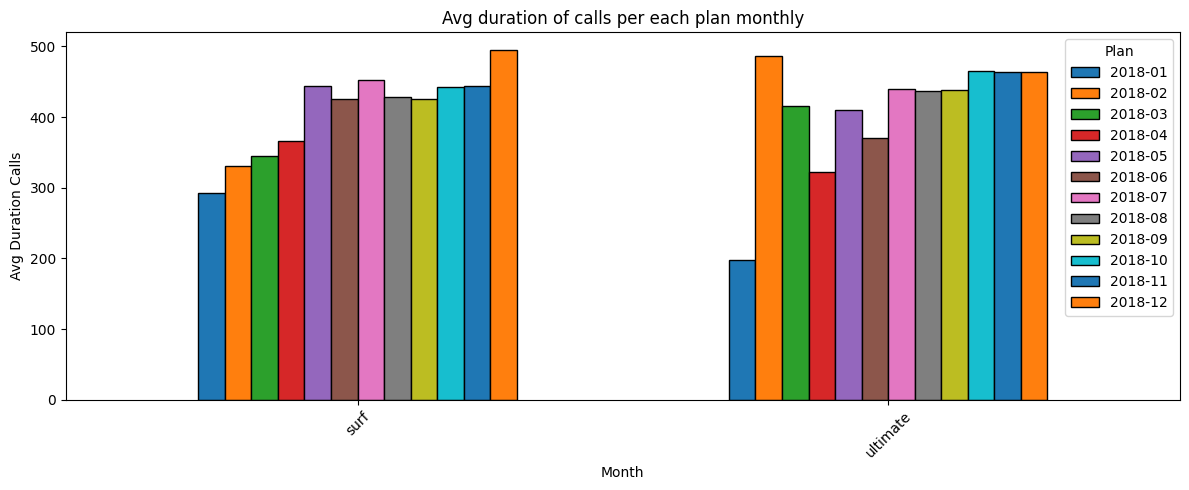

In [29]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
avg_calls_month = data_user_month.groupby(['plan', 'month'])['minutes_used'].mean().unstack() # We used group_by() to group the data with the asked indicators and then used mean() to calculate the avg, and finally we use unstack() to converts the plans into columns, with months as the index.
avg_calls_month.plot(kind='bar', 
                     figsize=[12, 5],
                     title= 'Avg duration of calls per each plan monthly',
                    width = 0.6,
                    xlabel='Month',
                    ylabel='Avg Duration Calls',
                     edgecolor='black'
                    )
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.tight_layout()
plt.show()




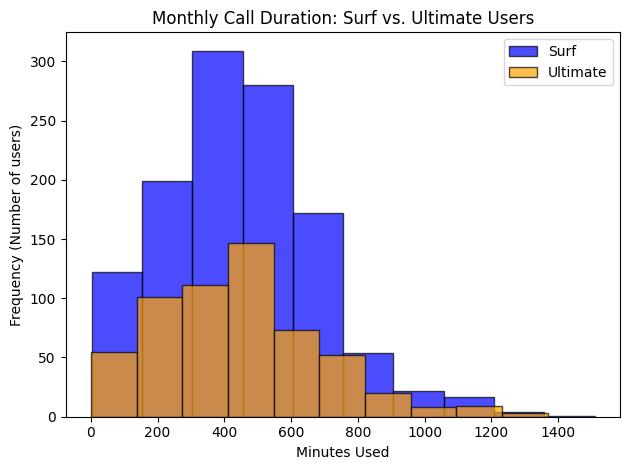

In [44]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
surf_minutes = data_user_month[data_user_month['plan'] == 'surf']['minutes_used'] # We created masks to filter the data needed.
ultimate_minutes = data_user_month[data_user_month['plan'] == 'ultimate']['minutes_used']
plt.hist(surf_minutes,
        bins=10,
        alpha=0.7,
        label='Surf',
        color='blue',
        edgecolor='black')
plt.hist(ultimate_minutes, 
         bins=10,
        alpha=0.7,
        label='Ultimate',
        color='orange',
        edgecolor='black')
plt.title("Monthly Call Duration: Surf vs. Ultimate Users")
plt.xlabel('Minutes Used')
plt.ylabel('Frequency (Number of users)')
plt.legend()
plt.tight_layout()
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [31]:
# Calculate the mean and the variance of the monthly call duration
monthly_call_mean = data_user_month.groupby(['plan', 'month'])['minutes_used'].mean()
variance_monthly =  data_user_month.groupby(['plan', 'month'])['minutes_used'].var()

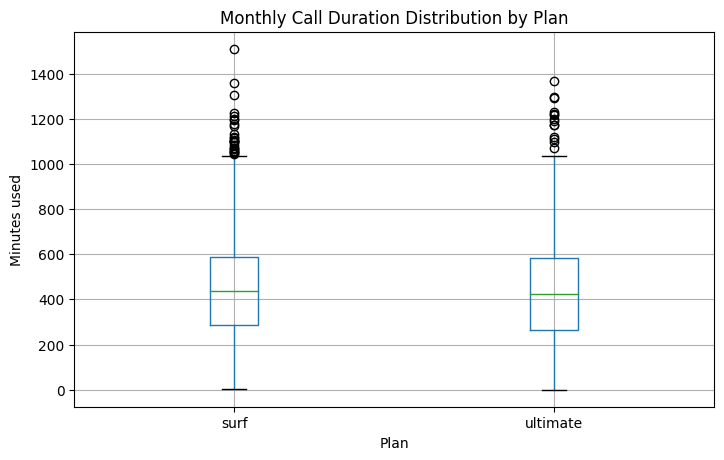

In [32]:
# Plot a boxplot to visualize the distribution of the monthly call duration
data_user_month.boxplot(column='minutes_used', by='plan', figsize=(8, 5))

plt.title('Monthly Call Duration Distribution by Plan')
plt.suptitle('')  # Elimina el título automático de pandas
plt.xlabel('Plan')
plt.ylabel('Minutes used')
plt.show()

- The average number of minutes used per month is pretty similar for both Surf and Ultimate plans. However, users on the Surf plan tend to go over their included minutes more often. You can see this in the wider spread and higher number of outliers compared to Ultimate users. This suggests that Surf customers are more likely to exceed their plan limits, which could result in extra charges.

### Messages

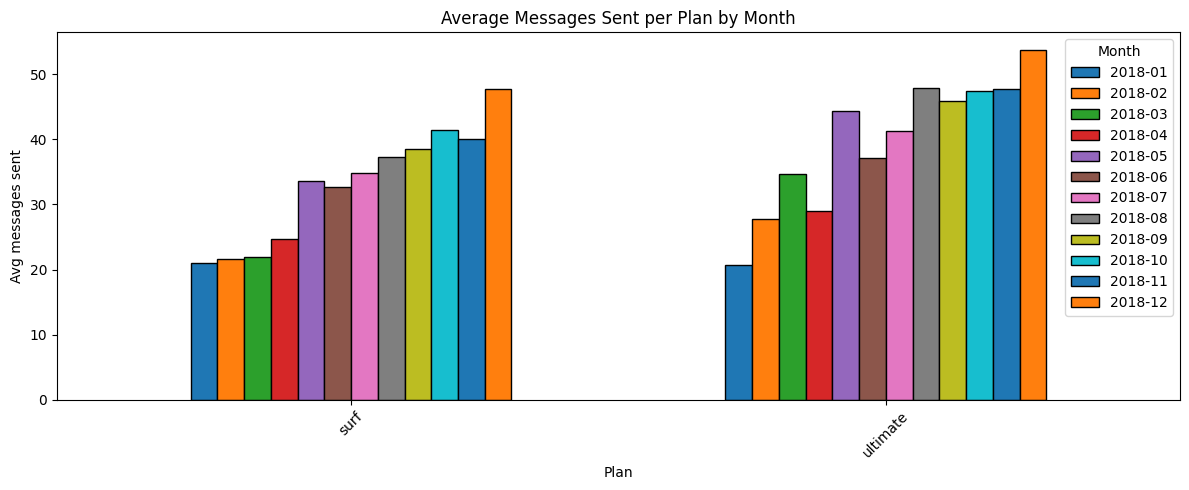

In [33]:
# Compare the number of messages users of each plan tend to send each month
monthly_messages_users = data_user_month.groupby(['plan', 'month'])['messages_sent'].mean().unstack()

monthly_messages_users.plot(kind='bar', 
                     figsize=[12, 5],
                     title='Average Messages Sent per Plan by Month',
                    width = 0.6,
                    xlabel='Plan',
                    ylabel='Avg messages sent',
                     edgecolor='black'
                    )
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.tight_layout()
plt.show()

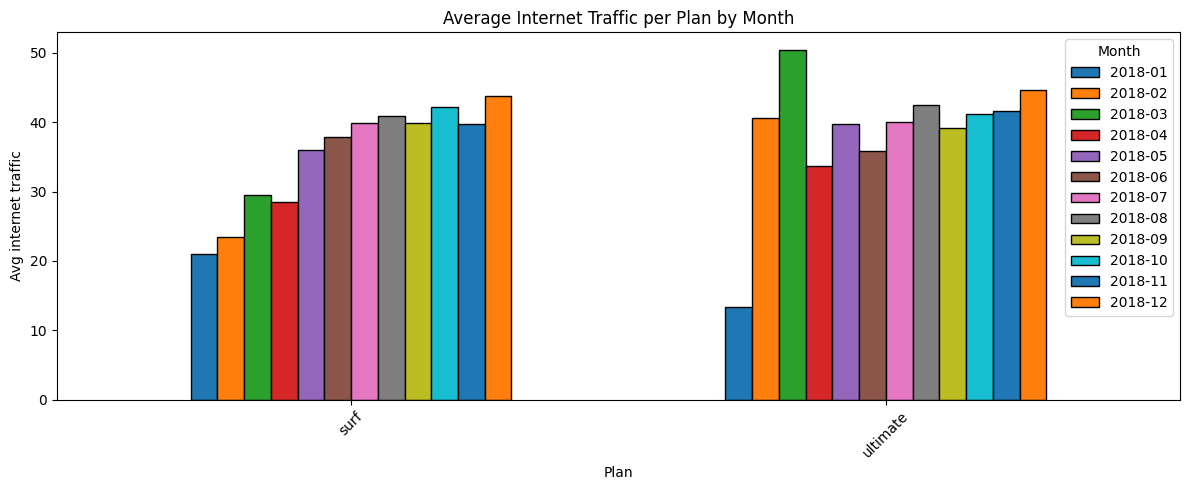

In [34]:
# Compare the amount of internet traffic consumed by users per plan
monthly_net_users = data_user_month.groupby(['plan', 'month'])['gb_used'].mean().unstack()

monthly_net_users.plot(kind='bar', 
                     figsize=[12, 5],
                     title='Average Internet Traffic per Plan by Month',
                    width = 0.6,
                    xlabel='Plan',
                    ylabel='Avg internet traffic',
                     edgecolor='black',
                       
                    )
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.tight_layout()
plt.show()

- The visualizations suggest a clear trend: as the year progresses, there is a noticeable increase in internet usage, calls, and messages across both plans. This upward trend toward the end of the year could indicate higher overall engagement with mobile services during that period. Additionally, users on the Surf plan tend to exceed the limits of their base plan more often, especially in call minutes and internet usage. This behavior likely results in higher monthly revenue compared to Ultimate plan users, whose usage stays within the included allowances.

### Internet

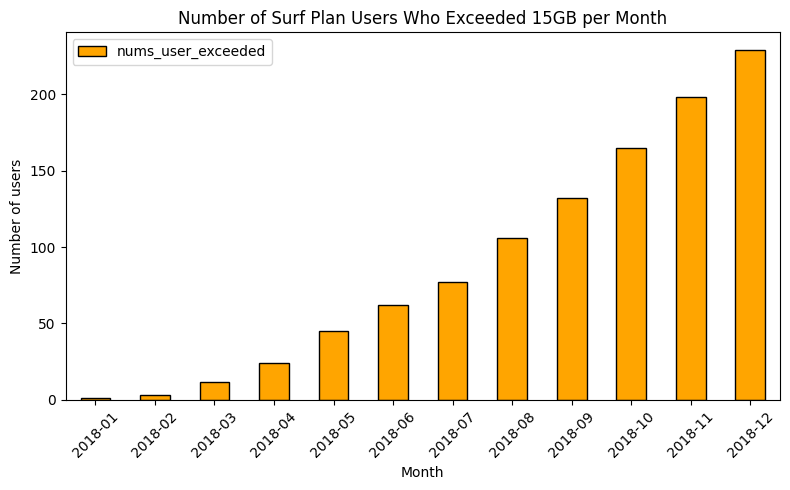

In [35]:
surf_exceeded = data_user_month[
    (data_user_month['plan'] == 'surf') & (data_user_month['gb_used'] > 15)
]
exceeded_count = surf_exceeded.groupby('month')['user_id'].nunique().reset_index()
exceeded_count.columns = ['month', 'nums_user_exceeded']

exceeded_count.plot(kind='bar', 
                    x='month',
                    y='nums_user_exceeded',
                    title='Number of Surf Plan Users Who Exceeded 15GB per Month',
                    figsize=(8, 5),
                    xlabel='Month',
                    ylabel='Number of users',
                    color='orange',
                    edgecolor='black'
                   )





plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- We can observe a clear upward trend in the number of users exceeding their data limits over the months. This increase peaks in December, likely due to the holiday season, when people tend to use more mobile internet for streaming, social media, and staying connected.

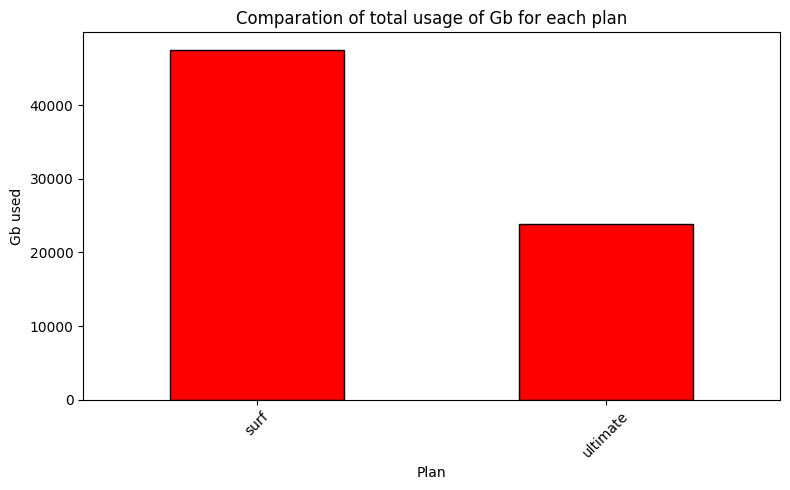

In [36]:
total_gb_per_plan = data_user_month.groupby('plan')['gb_used'].sum()

total_gb_per_plan.plot(kind='bar', 
                    title='Comparation of total usage of Gb for each plan',
                    figsize=(8, 5),
                    xlabel='Plan',
                    ylabel='Gb used',
                    color='red',
                    edgecolor='black'
                   )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Users subscribed to the Surf plan consume nearly twice the total amount of internet data compared to those on the Ultimate plan. This suggests that Surf users often exceed their base plan limits, contributing to higher overall data usage and potentially more revenue.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

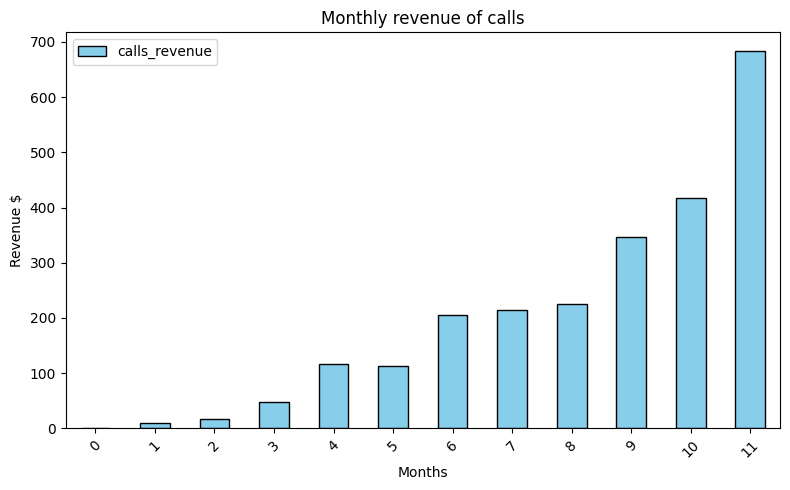

In [37]:
calls_revenue =  data_user_month.groupby(['month'])['calls_revenue'].sum().reset_index()

calls_revenue.plot(kind='bar', 
                    title='Monthly revenue of calls',
                    figsize=(8, 5),
                    xlabel='Months',
                    ylabel='Revenue $',
                    color='skyblue',
                    edgecolor='black'
                   )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 


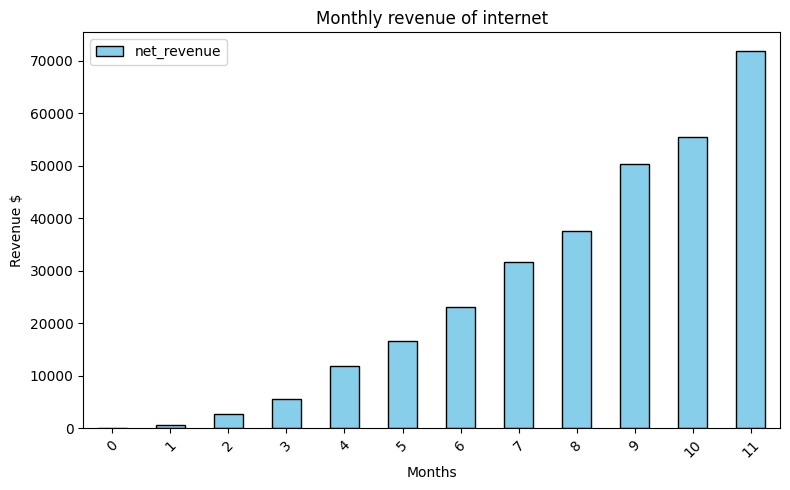

In [38]:
net_revenue = data_user_month.groupby(['month'])['net_revenue'].sum().reset_index()

net_revenue.plot(kind='bar', 
                    title='Monthly revenue of internet',
                    figsize=(8, 5),
                    xlabel='Months',
                    ylabel='Revenue $',
                    color='skyblue',
                    edgecolor='black'
                   )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 


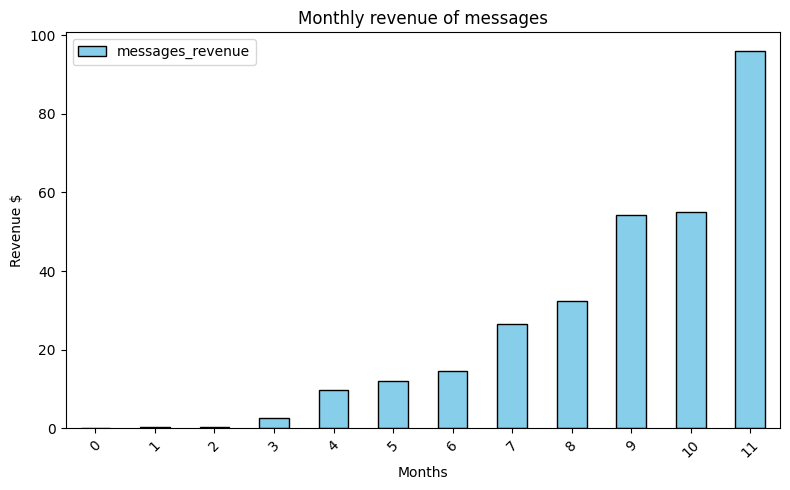

In [39]:
messages_revenue = data_user_month.groupby(['month'])['messages_revenue'].sum().reset_index()

messages_revenue.plot(kind='bar', 
                    title='Monthly revenue of messages',
                    figsize=(8, 5),
                    xlabel='Months',
                    ylabel='Revenue $',
                    color='skyblue',
                    edgecolor='black'
                   )

plt.xticks(rotation=45)
plt.tight_layout()




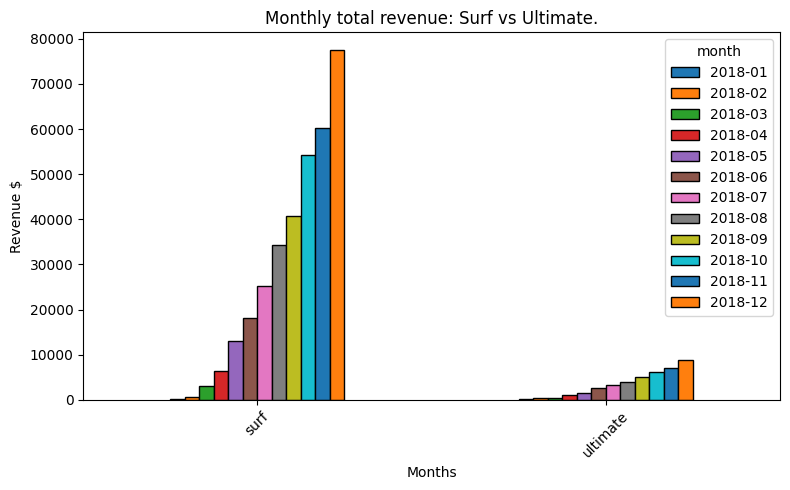

In [45]:
total_revenue = data_user_month.groupby(['plan', 'month'])['total_revenue'].sum().unstack()

total_revenue.plot(kind='bar', 
                    title='Monthly total revenue: Surf vs Ultimate.',
                    figsize=(8, 5),
                    xlabel='Months',
                    ylabel='Revenue $',
                    edgecolor='black'
                   )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





- The monthly total revenue from "surf" users shows a sharp and consistent increase throughout the year, reaching its peak in December. This trend suggests that users on the "surf" plan frequently exceed their monthly limits, especially toward the end of the year, likely due to increased communication and internet usage during the holiday season. In contrast, revenue from "ultimate" plan users remains relatively low and stable across all months, confirming that their fixed monthly fee covers all usage without additional charges.

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [41]:
# Test the hypotheses
# The average revenue from user of the ultimate 
data = data_user_month[['user_id', 'plan', 'month', 'total_revenue']]
usr_avg_income = data.groupby(['user_id', 'plan'])['total_revenue'].mean().reset_index()
usr_avg_income.rename(columns={'total_revenue': 'monthly_income'}, inplace=True)

surf_income = usr_avg_income[usr_avg_income['plan'] == 'surf']['monthly_income']
ultimate_income =  usr_avg_income[usr_avg_income['plan'] == 'ultimate']['monthly_income']

t_stat, p_value = stats.ttest_ind(surf_income, ultimate_income, equal_var=False)

 

alpha = 0.05
print('T-statistic:', t_stat)
print('P-value:', p_value)

# Tabla resumen
results_df = pd.DataFrame({
    "T-statistic": [t_stat],
    "P-value": [p_value],
    "Decision": ["Reject H₀" if p_value < alpha else "Fail to reject H₀"]
})

results_df
# **Note**: The warning is caused by zero variance in the 'Ultimate' group — all users have identical revenue. 
# This causes instability in the t-test, but due to the large difference in means and extremely small p-value, we confidently reject the null hypothesis.




T-statistic: 25.829474394157987
P-value: 7.260294885434253e-74


/tmp/ipykernel_434/634589893.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(surf_income, ultimate_income, equal_var=False)


,T-statistic,P-value,Decision
0,25.829474,7.260295e-74,Reject H₀


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [42]:
# Test the hypotheses

df = data_user_month.merge(users[['user_id', 'state_info']], on='user_id')
user_income = df.groupby(['user_id', 'state_info'])['total_revenue'].mean().reset_index()
user_income.rename(columns={'total_revenue': 'monthly_income'}, inplace=True)

ny_nj_income = user_income[user_income['state_info'] == 'NY-NJ-PA MSA']['monthly_income']
other_income = user_income[user_income['state_info'] != 'NY-NJ-PA MSA']['monthly_income']

t_stat, p_value = stats.ttest_ind(ny_nj_income, other_income, equal_var=False)

alpha = 0.05
print("T-statistic:", t_stat)
print("P-value:", p_value)

results_df = pd.DataFrame({
    "T-statistic": [t_stat],
    "P-value": [p_value],
    "Decision": ["Reject H₀" if p_value < alpha else "Fail to reject H₀"]
})

results_df





T-statistic: 0.21443612291116063
P-value: 0.8306616500350151


,T-statistic,P-value,Decision
0,0.214436,0.830662,Fail to reject H₀


## General conclusion

- After processing and analyzing data on 500 Megaline clients, we found clear evidence that the Surf plan generates more revenue on average than the Ultimate plan. This is largely due to Surf users frequently exceeding their plan limits, especially for internet usage, which results in additional charges. In contrast, Ultimate users pay a fixed amount and tend to stay within their included allowances.

- Statistical hypothesis testing confirmed this difference with a very small p-value, allowing us to confidently reject the null hypothesis and conclude that there is a significant revenue difference between the two plans.

- We also tested for regional revenue differences (NY-NJ area vs. other regions), but the results showed no statistically significant difference, meaning location does not appear to influence average user revenue.